In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import necessary packages
import sys
sys.path.append(r"../")
import utils.functions as f0

from astropy.constants import c, G
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from astropy.table import Table
from random import randint
import math
import pandas as pd

font = {'family' : 'serif', 'size' : '20'}
plt.rc('font', **font)
px = 1/plt.rcParams['figure.dpi']

## Cosmological model to compute distances
co     = FlatLambdaCDM(Om0=0.3,H0=70.0)

# How to simulate a Gravitationnal Lens

#### These codes come from [*Introduction to gravitational lensing / with python examples* - Massimo Meneghetti](https://link.springer.com/book/10.1007/978-3-030-73582-1)

First, let's look at the galaxy that will act as the deflector. As part of a SIE (Singular Isothermal Ellipsoid) lens model, the deflecting galaxy is approximated by a two-dimensional mass distribution. 

### Galaxy deflector as an elliptical lenses: the SIE

The Singular Isothermal Sphere (SIS for short) is a popular model used for lenses that have symmetry around an axis. This model assumes that the lens is made up of matter behaving like a gas, which is confined by a gravitational potential that is symmetric in a spherical shape. The gas in the lens is thought to be in a balanced state both in terms of temperature and pressure. To meet these requirements, a density profile called $\rho$ is used.

$$
\rho(r) = \frac{\sigma_v^2}{2 \pi G r^2}
$$

Here the velocity dispersion of the "gas" particles is represented by $\sigma_v$, and the distance from the center of the sphere is denoted by $r$, which is calculated as the square root of the sum of $\xi$ squared and $z$ squared. $\xi$ measures the distance from the center of the lens on the lens plane, while $z$ represents the coordinate along the line-of-sight. To transform the three-dimensional density into a two-dimensional representation on the lens plane, we project it and obtain the surface density called $\Sigma$.

$$
\Sigma(\xi)= \frac{\sigma_v^2}{2G}\frac{\sqrt{f}}{\sqrt{\xi_1^2+f^2\xi_2^2}}
$$

The SIE can be derived from the SIS (power-law lens with n=2) by making the substitution:

$$
\xi \Rightarrow \sqrt{\xi_1^2+f^2\xi_2^2}
$$

With this substitution, $\Sigma(\xi)$ will be constant on ellipses with minor axis $\xi$ and major axis $\xi/f$, oriented such that the major axis is along the $\xi_2$ axis. In the above formulas, $f=b/a$ is the axis ratio of the ellipses.

By choosing $\xi_0=\xi_{0,SIS}$ as reference scale, and using polar coordinates, we obtain the convergence for the singular isothermal profile:

$$
\kappa(x,\varphi)=\frac{\sqrt{f}}{2x\Delta(\varphi)}
$$

The reference scale gives us the definition of the **Einstein radius** for a SIS (and SIE) lens model:

$$
\theta_0 = 4 \pi (\frac{\sigma_v^2}{c}) \frac{D_{LS}}{D_S}
$$

## What to do in Python ?

1. Choose the size of the deflector galaxy by setting $\sigma_v \simeq \sqrt{\frac{GM}{R}}$ (Faber-Jackson)
2. Set *f* as the ellipticity of the deflector mass
3. Set the redshift of the deflector *zL*

In [3]:
## Lens (deflector) parameters
sigmav = 250.0            # velocity dispersion (in /s)
f      = 0.7              # axis ratio of the density profile
zL     = 0.5              # redshift of the lens

## Background source

For the background source, the simplest case is to start from a point source such as quasars can be. This way, the source will simply be a point at positions y1, y2 in the source plane at redshift zS.

## What to do in Python ?

1. Set the redshift of the distant source *zS*
2. Choose the source coordinates (*y1*, *y2*)

In [4]:
zS = 1.0             # redshift of the source
y1, y2 = 0.01, 0.01  # source position in the source plane

In [5]:
## Call of the SIE_LENS object in a variable
sie = f0.sie_lens(co, zl=zL, zs=zS, sigmav=sigmav,f=f,pa=0.)

In [6]:
## Compute the polar coordinates of the images and retrieve  einstein radius $\theta_E$## 
x, phi,theta_E = sie.phi_ima(y1,y2)

## Convert to Cartesian coordinates
## The coordinates of an image in the lens plane are x1 and x2
## You can choose to denormalize the lens by multiplying by the einstein radius

x1_ima = x*np.cos(phi)
x2_ima = x*np.sin(phi)

- Compute the magnifications of the images

In [7]:
## To denormalize the lens you need to compute the magnification at the new coordinates

mu = sie.mu(x, phi)

- We can also compute the differents characteristics lines of the lens (critical line, cut and cautic)

In [8]:
y1_cut,y2_cut = sie.cut()
y1_cau,y2_cau = sie.tan_caustic()
x1_cc,x2_cc   = sie.tan_cc()

## Figure of the lens 

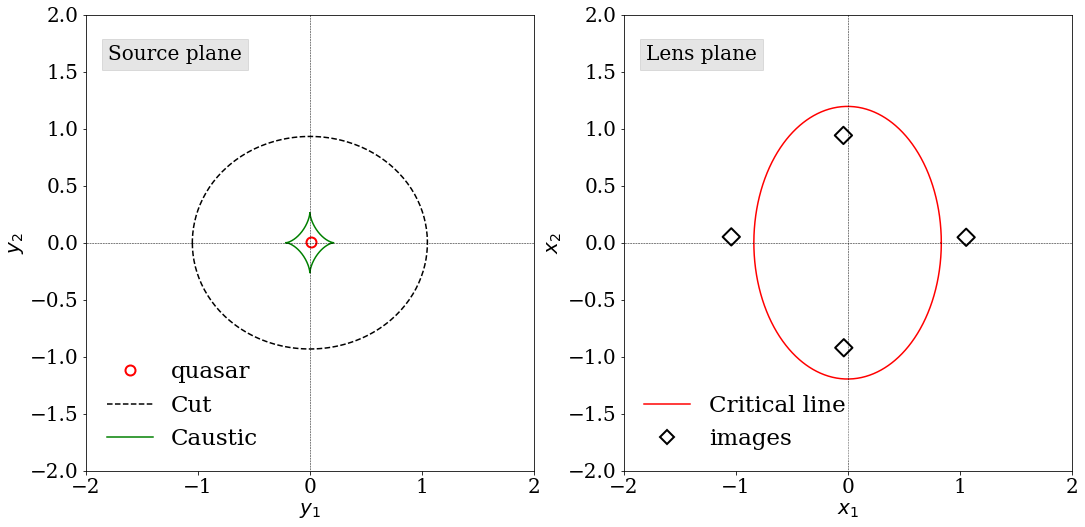

In [9]:
fig = plt.figure(figsize=(2*636*px,0.95*636*px))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])

ax1.text(-1.8, 1.6, 'Source plane', bbox=dict(boxstyle="square",fc=(0, 0, 0),alpha=0.1))
ax2.text(-1.8, 1.6, 'Lens plane', bbox=dict(boxstyle="square",fc=(0, 0, 0),alpha=0.1))

ax2.scatter(x1_ima[0], x2_ima[0], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "A")
if len(x1_ima)>1:
    ax2.scatter(x1_ima[1], x2_ima[1], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "B")
    if len(x1_ima)>2:
        ax2.scatter(x1_ima[2], x2_ima[2], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "C")
        if len(x1_ima)>3:
            ax2.scatter(x1_ima[3], x2_ima[3], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "D")

ax1.plot(y1,y2,'o',markersize=10,color='red',mfc='none',mew=2,label=f'quasar')

ax1.plot(y1_cut,y2_cut,'--',color='black',label='Cut')
ax1.plot(y1_cau,y2_cau,color='green',label='Caustic')
ax2.plot(x1_cc,x2_cc,color='red',label='Critical line')

#ax1.plot(100,100,'o',c='black',markersize=10,mfc='none',mew=2,label='quasar')
ax2.plot(100,100,'D',c='black',markersize=10,mfc='none',mew=2,label='images')

ax1.plot(np.linspace(-1e3,1e3,2),np.linspace(0,0,2),'--',linewidth=0.5,color='black')
ax1.plot(np.linspace(0,0,2),np.linspace(-1e3,1e3,2),'--',linewidth=0.5,color='black')
ax2.plot(np.linspace(-1e3,1e3,2),np.linspace(0,0,2),'--',linewidth=0.5,color='black')
ax2.plot(np.linspace(0,0,2),np.linspace(-1e3,1e3,2),'--',linewidth=0.5,color='black')

ax1.legend(edgecolor='white',framealpha=0.3,fontsize=23,loc=3)
ax2.legend(edgecolor='white',framealpha=0.3,fontsize=23,loc=3)
ax1.set_xlabel("$y_1$")
ax1.set_ylabel("$y_2$")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)
plt.show()

---

---

# How to simulate the same lens with Lenstronomy package ?

- Import Lenstronomy package and define the custom function *lenstronomy_GL*
- Choose the parameters for the function :
    - q is the ellipticity of the deflector mass
    - phi is the position angle of the deflector
    - tE is the einstein radius (default is 1)
    - zL is the redshift of the deflector
    - zS is the redshift of the source
    - gamma_ext is the shear strength
    - psi_ext is the shear angle
    - y1 and y2 are the coordinates of the source
    
If you want to choose the size of the deflector galaxy, you have to calculate the Einstein radius before calling the function. 
Otherwise the default Einstein radius is 1.

In [10]:
## Lens parameters
q         = 0.7
phi       = 0.0
zL        = 0.5
zS        = 1.0
gamma_ext = 0.05
psi_ext   = 60          # in degree
y1, y2    = 0.05, 0.0

## Compute a custom einstein radius for a SIE lens
sigmav = 250.0
dl     = co.angular_diameter_distance(zL)
ds     = co.angular_diameter_distance(zS)
dls    = co.angular_diameter_distance_z1z2(zL,zS)
tE     = np.rad2deg((4.0*np.pi*sigmav**2/(c.to("km/s"))**2*dls/ds).value)*3600.0         # in arcsec

x1_ima, x2_ima, mu = f0.Lenstronomy_GL(f,phi,zL,zS,gamma_ext,np.radians(psi_ext),y1,y2,tE)

## Figure of the lens 

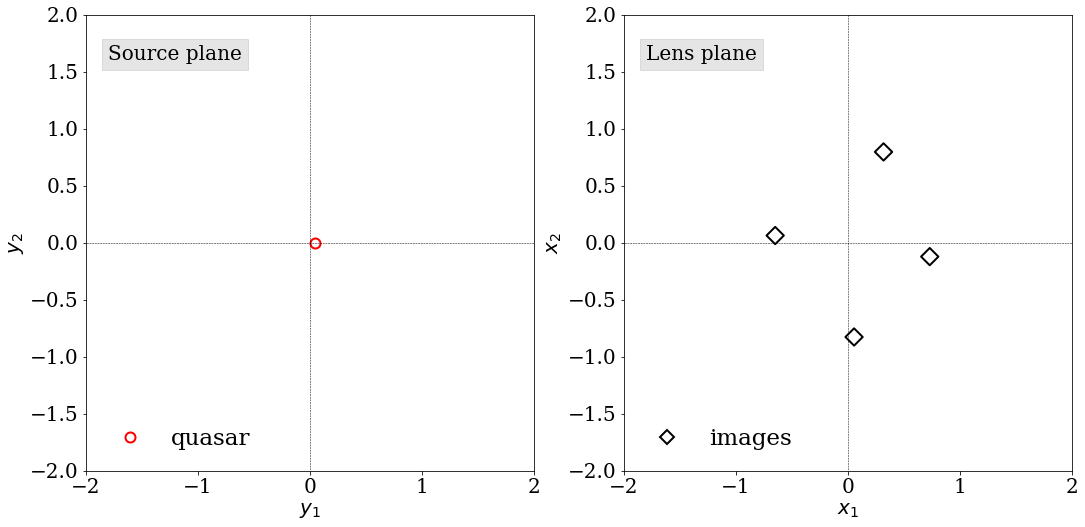

In [11]:
fig = plt.figure(figsize=(2*636*px,0.95*636*px))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])

ax1.text(-1.8, 1.6, 'Source plane', bbox=dict(boxstyle="square",fc=(0, 0, 0),alpha=0.1))
ax2.text(-1.8, 1.6, 'Lens plane', bbox=dict(boxstyle="square",fc=(0, 0, 0),alpha=0.1))

ax2.scatter(x1_ima[0], x2_ima[0], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "A")
if len(x1_ima)>1:
    ax2.scatter(x1_ima[1], x2_ima[1], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "B")
    if len(x1_ima)>2:
        ax2.scatter(x1_ima[2], x2_ima[2], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "C")
        if len(x1_ima)>3:
            ax2.scatter(x1_ima[3], x2_ima[3], marker='D', s=150, color='black', facecolors='none', linewidths=2) #, label = "D")

ax1.plot(y1,y2,'o',markersize=10,color='red',mfc='none',mew=2,label=f'quasar')

#ax1.plot(100,100,'o',c='black',markersize=10,mfc='none',mew=2,label='quasar')
ax2.plot(100,100,'D',c='black',markersize=10,mfc='none',mew=2,label='images')

ax1.plot(np.linspace(-1e3,1e3,2),np.linspace(0,0,2),'--',linewidth=0.5,color='black')
ax1.plot(np.linspace(0,0,2),np.linspace(-1e3,1e3,2),'--',linewidth=0.5,color='black')
ax2.plot(np.linspace(-1e3,1e3,2),np.linspace(0,0,2),'--',linewidth=0.5,color='black')
ax2.plot(np.linspace(0,0,2),np.linspace(-1e3,1e3,2),'--',linewidth=0.5,color='black')

ax1.legend(edgecolor='white',framealpha=0.3,fontsize=23,loc=3)
ax2.legend(edgecolor='white',framealpha=0.3,fontsize=23,loc=3)
ax1.set_xlabel("$y_1$")
ax1.set_ylabel("$y_2$")
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)
plt.show()